In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda
import myfunc as mf

In [2]:

# Transcribed data
data = {
    'duration': [86, 15, 28, 11, 19, 71, 20, 22, 34, 26, 70, 25, 37, 18, 45, 68, 14, 36, 20, 15, 74, 30, 16, 25, 28, 61, 29, 32, 30, 41],
    'operator': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]
}

# Create DataFrame
data = pd.DataFrame(data)

data.head()

,duration,operator
0,86,1
1,15,2
2,28,3
3,11,4
4,19,5


Number of points n = 30
Mean = 34.87


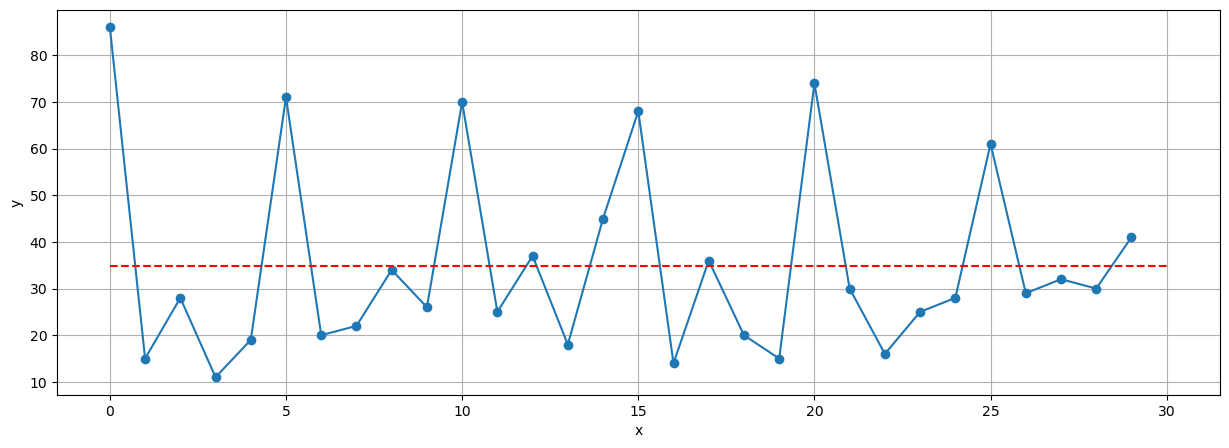

In [3]:
d=data['duration']
mf.single_ts_plot(d)

Runs test statistic = 1.120
Runs test p-value = 0.26278
Accept H0: the data are random
p-value of the Shapiro-Wilk test: 0.00066


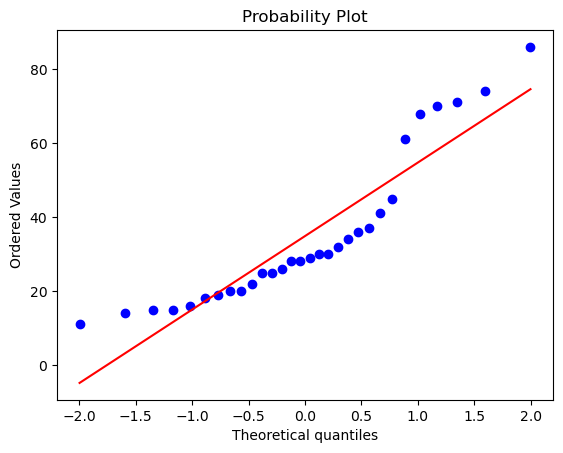

Reject H0: the data are not normal


In [4]:
mf.runs(d)
mf.shapiroqq(d)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


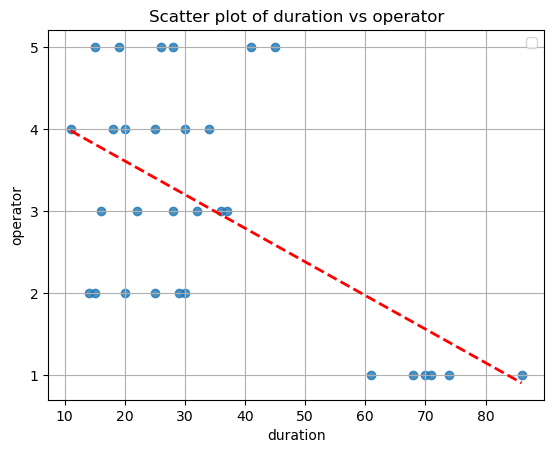

In [15]:
mf.scatter_plot_nice_h(data,'duration','operator')

#we can see that the operator 1 tends to be slow wrt to the other operators

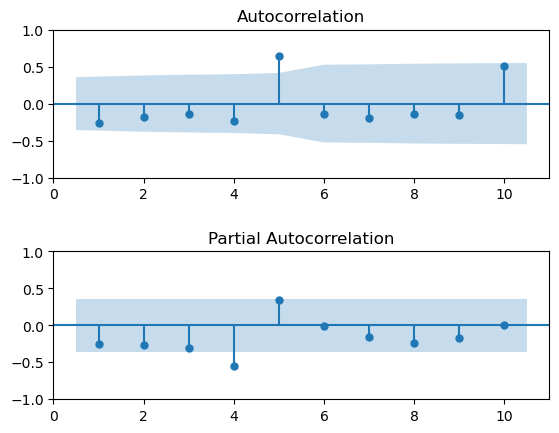

Standardized Test statistic rk*sqrt(n) = 3.498874
Rejection region of the standard normal starts at 1.959964
p-value = 0.000467
The null hypothesis is rejected


In [14]:
mf.acfpacf(d)
mf.bartlett_test(d,5)

#we can see an autocorrelation at the lag5, which means that xt is correlated with xt-5
#we cannot know if this happen for all the operator from here, but the scatterplot suggest us that 
#the trigger of the phenomena is the operator1

In [ ]:
#so we can create a model with a dummy for the operator 1!

In [16]:
data['dummy']=np.where(data['operator']==1, 1, 0)

In [17]:
import statsmodels.api as sm
import qda
x = data['dummy'] #se solo un regressore togli le doppie quadre e metti singole
x = sm.add_constant(x) 
y = data['duration']
model = sm.OLS(y, x).fit()
qda.summary(model)


REGRESSION EQUATION
-------------------
duration =  + 25.667 const + 46.000 dummy

COEFFICIENTS
------------
 Term    Coef  SE Coef  T-Value    P-Value
const 25.6667   1.8129  14.1576 2.7438e-14
dummy 46.0000   4.0538  11.3473 5.5079e-12

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
8.8815 0.8214      0.815

ANALYSIS OF VARIANCE
---------------------
    Source   DF     Adj SS     Adj MS  F-Value    P-Value
Regression  1.0 10156.8000 10156.8000 128.7611 5.5079e-12
     const  1.0 15810.6667 15810.6667 200.4371 2.7438e-14
     dummy  1.0 10156.8000 10156.8000 128.7611 5.5079e-12
     Error 28.0  2208.6667    78.8810      NaN        NaN
     Total 29.0 12365.4667        NaN      NaN        NaN


Shapiro-Wilk test p-value on the residuals = 0.58540


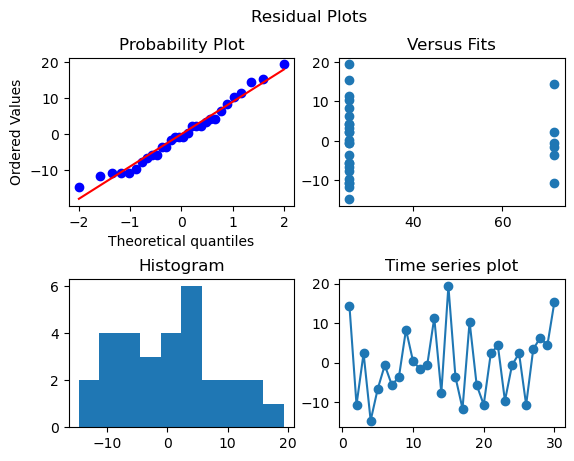

In [19]:
mf.shapirplusresplots(model)

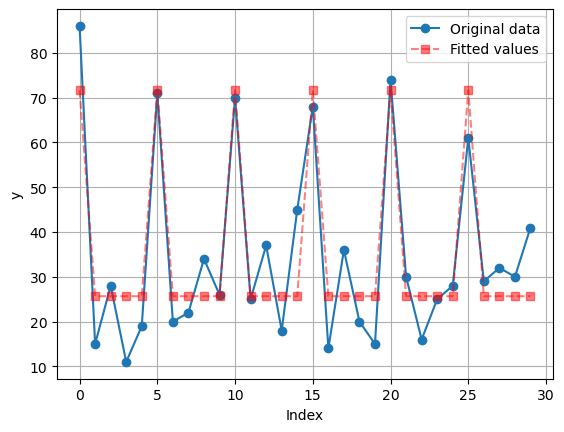

In [20]:
mf.plotyvsfits(y,model)

Runs test statistic = 0.398
Runs test p-value = 0.69047
Accept H0: the data are random


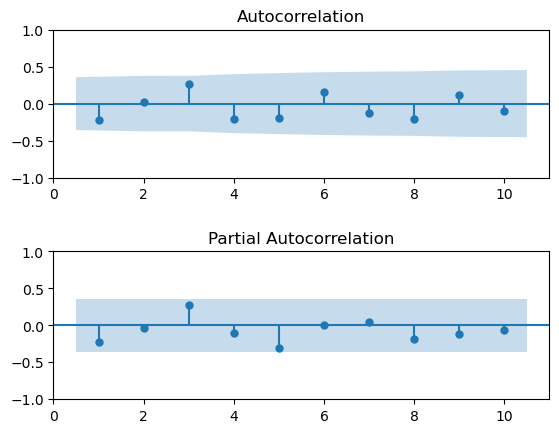

In [21]:
mf.runs(model.resid)
mf.acfpacf(model.resid)

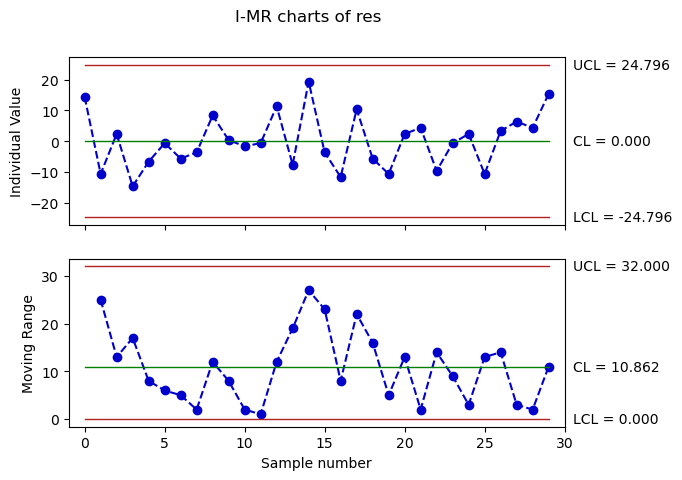

In [34]:
alpha=1/100 #0.01 (il classico invece è 0.0027)
k=stats.norm.ppf(1-alpha/2)
df_SCC = pd.DataFrame({'res': model.resid}) #lo chiamo direttamente df_SCC
df_SCC = qda.ControlCharts.IMR(df_SCC, 'res',K=k)


In [ ]:
#now we can redisign the MR chart using boxcox

Lambda = 0.426
p-value of the Shapiro-Wilk test: 0.249
box cox succeeded :)

ricorda che ad eg. LCL di questo individual chart sugli MR trasformati dei residui che chiamo y(individuals), è trovato come ybar-3*(MRbar_y/d2(2)), dove MRbar_y è MR medio calcolato sugli y


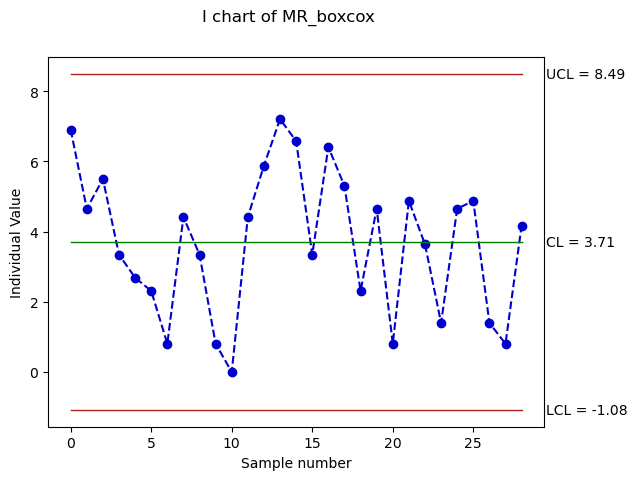

In [32]:
df_MR_boxcox=mf.IonMRresBoxCox(df_SCC, use04='no',alpha=0.01) 

Which is the expected number of assembly steps whose duration exceed the allowed one in each cycle? 
The maximum duration allowed by the company for one single assembly step is 90 minutes. 

Since the model is considered to be adeguate we can use our model assumption to answer the question
we know that the variable d is normally distributed with an expected value equal to the fits

In [35]:
mu45=25.667
mu15=71.667
duration_limit=90
sigmaeps=df_SCC['MR'].mean()/qda.constants.getd2(2)

In [37]:
p_45=1-stats.norm.cdf((duration_limit-mu45)/sigmaeps)
print(p_45)
p_15=1-stats.norm.cdf((duration_limit-mu15)/sigmaeps)
print(p_15)

expected_times=(4*p_45+p_15)/5
print(expected_times)

1.1698975121987587e-11
0.02842395630215322
0.005684791269789824
